___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("final_scout_dummy.csv")
df

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,...,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,...,1,1

In [17]:
X,y = df.drop(columns="price"),df["price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.model_selection import cross_validate, cross_val_score
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [23]:
y_train_pred = lm.predict(X_train)

In [24]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8917050633885377
MAE 		: 1691.4549243068466
MSE 		: 5904323.537842403
RMSE 		: 2429.8813834922894


In [25]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853655455758311
MAE 		: 1753.7165475819857
MSE 		: 6236571.376133318
RMSE 		: 2497.3128310512716


In [26]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,2.429881e+03,2.497313e+03
mae,1.691455e+03,1.753717e+03
mse,5.904324e+06,6.236571e+06
R2,8.917051e-01,8.853655e-01


## Cross Validate

In [ ]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [28]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.170005,0.037992,0.891659,-1695.161487,-5.380745e+06,-2319.643270
2,0.135992,0.026994,0.880459,-1792.105460,-7.034688e+06,-2652.298705
3,0.096998,0.006003,0.896718,-1686.344514,-5.615709e+06,-2369.748705
4,0.138999,0.012031,0.871376,-1762.794075,-6.607365e+06,-2570.479504
5,0.120997,0.005000,0.882673,-1714.733535,-6.194759e+06,-2488.927366
6,0.099998,0.006003,0.892986,-1630.620018,-5.066175e+06,-2250.816583
7,0.095998,0.009002,0.884653,-1755.550438,-7.029012e+06,-2651.228417
8,0.101000,0.009001,0.891399,-1811.383715,-6.900400e+06,-2626.861259
9,0.121002,0.008000,0.890162,-1727.005584,-6.274461e+06,-2504.887489
10,0.128004,0.005996,0.885395,-1633.841738,-5.573243e+06,-2360.771725


In [29]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             8.867479e-01
test_neg_mean_absolute_error       -1.720954e+03
test_neg_mean_squared_error        -6.167656e+06
test_neg_root_mean_squared_error   -2.479566e+03
dtype: float64

In [30]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853655455758311
MAE 		: 1753.7165475819857
MSE 		: 6236571.376133318
RMSE 		: 2497.3128310512716


In [32]:
%matplotlib inline

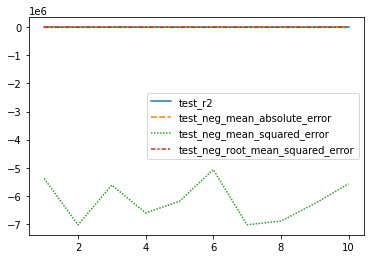

In [33]:
sns.lineplot(data = scores.iloc[:,2:]);

In [95]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-0.035780
1,628.960841
2,-1626.481634
3,89.910847
4,93.466901
...,...
137,-1614.044930
138,1985.382345
139,2491.558863
140,239.881214


In [ ]:
eval_metrics(y_test, y_pred)

In [ ]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_model = Ridge(alpha=1)

In [36]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [37]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8854449102678982
MAE 		: 1753.6825007555656
MSE 		: 6232253.62045238
RMSE 		: 2496.448201035299


In [38]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.891674805525177
MAE 		: 1691.4015299270354
MSE 		: 5905973.219909133
RMSE 		: 2430.220817108835


In [39]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2.430221e+03,2.496448e+03
mae,1.691402e+03,1.753683e+03
mse,5.905973e+06,6.232254e+06
R2,8.916748e-01,8.854449e-01


In [40]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,2.429881e+03,2.497313e+03,2.430221e+03,2.496448e+03
mae,1.691455e+03,1.753717e+03,1.691402e+03,1.753683e+03
mse,5.904324e+06,6.236571e+06,5.905973e+06,6.232254e+06
R2,8.917051e-01,8.853655e-01,8.916748e-01,8.854449e-01


## For Ridge Regression CV with alpha : 1 

In [41]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [42]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.892014,-1691.711660,-5.363085e+06,-2315.833448
2,0.880683,-1792.074852,-7.021545e+06,-2649.819751
3,0.897122,-1682.575535,-5.593760e+06,-2365.113046
4,0.871496,-1761.671091,-6.601156e+06,-2569.271521
5,0.882699,-1714.362793,-6.193388e+06,-2488.651853
6,0.893783,-1629.681325,-5.028468e+06,-2242.424653
7,0.884486,-1757.413470,-7.039195e+06,-2653.148120
8,0.891290,-1812.393088,-6.907323e+06,-2628.178706
9,0.893157,-1719.225814,-6.103350e+06,-2470.495866
10,0.885162,-1634.254605,-5.584573e+06,-2363.170075


<AxesSubplot:>

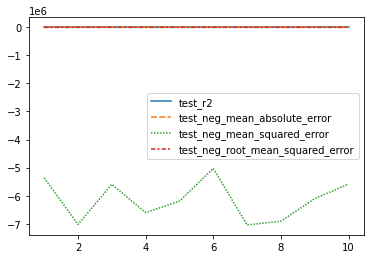

In [43]:
sns.lineplot(data = scores.iloc[:,2:])

In [44]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             8.871892e-01
test_neg_mean_absolute_error       -1.719536e+03
test_neg_mean_squared_error        -6.143584e+06
test_neg_root_mean_squared_error   -2.474611e+03
dtype: float64

In [45]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8854449102678982
MAE 		: 1753.6825007555656
MSE 		: 6232253.62045238
RMSE 		: 2496.448201035299


In [97]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [98]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-0.035780,-0.035817
1,628.960841,630.184484
2,-1626.481634,-1624.108359
3,89.910847,96.870995
4,93.466901,94.180987
...,...,...
137,-1614.044930,-1612.527387
138,1985.382345,1987.633173
139,2491.558863,2097.596508
140,239.881214,-69.875985


## Choosing best alpha value with Cross-Validation

In [46]:
from sklearn.linear_model import RidgeCV

In [47]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [48]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [49]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [50]:
ridge_cv_model.alpha_

1.0

In [51]:
y_pred = ridge_cv_model.predict(X_test)

In [52]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8854449102678982
MAE 		: 1753.6825007555656
MSE 		: 6232253.62045238
RMSE 		: 2496.448201035299


In [53]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.891674805525177
MAE 		: 1691.4015299270354
MSE 		: 5905973.219909133
RMSE 		: 2430.220817108835


In [54]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,2.430221e+03,2.496448e+03
mae,1.691402e+03,1.753683e+03
mse,5.905973e+06,6.232254e+06
R2,8.916748e-01,8.854449e-01


In [55]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,2.429881e+03,2.497313e+03,2.430221e+03,2.496448e+03,2.430221e+03,2.496448e+03
mae,1.691455e+03,1.753717e+03,1.691402e+03,1.753683e+03,1.691402e+03,1.753683e+03
mse,5.904324e+06,6.236571e+06,5.905973e+06,6.232254e+06,5.905973e+06,6.232254e+06
R2,8.917051e-01,8.853655e-01,8.916748e-01,8.854449e-01,8.916748e-01,8.854449e-01


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [56]:
from sklearn.linear_model import Lasso, LassoCV

In [57]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [58]:
y_train_pred = lasso_model.predict(X_train)

In [59]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8913828656503525
MAE 		: 1692.5392150324026
MSE 		: 5921890.007235442
RMSE 		: 2433.49337521914


In [60]:
y_pred = lasso_model.predict(X_test)

In [61]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853061184632274
MAE 		: 1753.878603385097
MSE 		: 6239804.447998947
RMSE 		: 2497.9600573265675


In [62]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.433493e+03,2.497960e+03
mae,1.692539e+03,1.753879e+03
mse,5.921890e+06,6.239804e+06
R2,8.913829e-01,8.853061e-01


In [63]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,2.429881e+03,2.497313e+03,2.430221e+03,2.496448e+03,2.430221e+03,2.496448e+03,2.433493e+03,2.497960e+03
mae,1.691455e+03,1.753717e+03,1.691402e+03,1.753683e+03,1.691402e+03,1.753683e+03,1.692539e+03,1.753879e+03
mse,5.904324e+06,6.236571e+06,5.905973e+06,6.232254e+06,5.905973e+06,6.232254e+06,5.921890e+06,6.239804e+06
R2,8.917051e-01,8.853655e-01,8.916748e-01,8.854449e-01,8.916748e-01,8.854449e-01,8.913829e-01,8.853061e-01


## For Lasso CV with Default Alpha : 1

In [64]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [65]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.892444,-1688.435277,-5.341735e+06,-2311.219279
2,0.880921,-1791.037336,-7.007545e+06,-2647.176778
3,0.897374,-1680.194552,-5.580075e+06,-2362.218319
4,0.871689,-1760.350026,-6.591268e+06,-2567.346426
5,0.882313,-1716.654407,-6.213787e+06,-2492.746945
6,0.895256,-1623.414634,-4.958725e+06,-2226.819369
7,0.884138,-1761.640433,-7.060370e+06,-2657.135698
8,0.891306,-1811.284899,-6.906290e+06,-2627.982107
9,0.894953,-1709.640295,-6.000768e+06,-2449.646522
10,0.885507,-1629.428862,-5.567781e+06,-2359.614547


<AxesSubplot:>

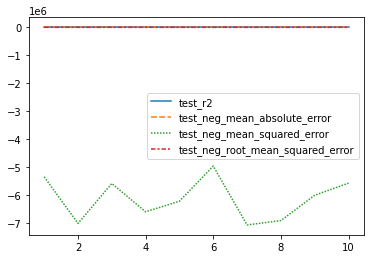

In [66]:
sns.lineplot(data = scores.iloc[:,2:])

In [67]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             8.875900e-01
test_neg_mean_absolute_error       -1.717208e+03
test_neg_mean_squared_error        -6.122834e+06
test_neg_root_mean_squared_error   -2.470191e+03
dtype: float64

In [68]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853061184632274
MAE 		: 1753.878603385097
MSE 		: 6239804.447998947
RMSE 		: 2497.9600573265675


In [69]:
lasso_model.coef_

array([-3.58957543e-02,  6.30409151e+02, -1.62409744e+03,  8.70624811e+01,
        9.51515442e+01, -2.40726141e+02, -7.69634907e-01, -1.28821251e+00,
        1.23428905e+02,  2.28034448e+02, -3.46923175e+02,  3.41311361e+01,
        2.22105644e+02, -2.17073334e+02,  2.46852090e+02, -0.00000000e+00,
       -0.00000000e+00,  3.81468417e+01,  9.79347397e+01,  3.72500357e+02,
        2.41052518e+03,  3.01479288e+02,  1.37864469e+02,  1.13219455e+02,
       -2.87795523e+01,  1.73005649e+02,  1.07544362e+02, -3.92926621e+02,
        3.57963899e+02,  1.37786765e+02,  3.18374811e+02, -1.10376400e+02,
        6.90070860e+02, -1.14857771e+01,  9.74408486e+02,  3.11134742e+02,
       -5.32314750e+02,  4.92379868e+01, -2.43306908e+02,  1.95309345e+01,
        8.82929746e+02, -1.84899740e+02,  0.00000000e+00,  5.50950885e+02,
        1.71497952e+01, -7.83205551e+02, -0.00000000e+00, -4.57103924e+02,
        8.16968408e+01,  7.90574896e+02, -7.33786313e+01,  1.92249876e+01,
       -0.00000000e+00,  

In [70]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [96]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

NameError: name 'rm_df' is not defined

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [72]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [73]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [74]:
elastic_model.l1_ratio

0.5

In [75]:
elastic_model.alpha

1.0

In [76]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8072198888883049
MAE 		: 2343.9044757264164
MSE 		: 10510520.466422068
RMSE 		: 3241.99328599275


In [77]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8089102396639265
MAE 		: 2343.140739879136
MSE 		: 10396044.850306984
RMSE 		: 3224.2898210779663


In [78]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,3.241993e+03,3.224290e+03
mae,2.343904e+03,2.343141e+03
mse,1.051052e+07,1.039604e+07
R2,8.072199e-01,8.089102e-01


In [80]:
elastic_model.coef_

array([-5.82231883e-02,  7.55978642e+02, -8.79395179e+02, -1.17324183e+02,
        1.54948521e+02, -9.93480542e+01, -2.22399494e+00,  4.39056115e+00,
       -3.39496044e+02,  3.01678522e+01,  1.08640580e+00,  2.17054972e+02,
        3.15718865e+02,  9.64467428e+00, -1.04699933e+02, -0.00000000e+00,
        7.72557246e+01, -4.23625187e+01,  6.74654474e+01,  1.37770343e+02,
        2.52853077e+02, -1.51624635e+02, -1.28805403e+02,  2.73206922e+01,
       -0.00000000e+00,  1.33465484e+02,  6.59359483e+01, -3.02639814e+01,
        1.21478851e+02, -1.06449514e+01,  1.41993595e+02,  1.38241706e+02,
        2.33839427e+02, -4.01616385e+01,  1.65162016e+02,  8.86865017e+01,
        1.34315659e+02, -2.94767876e+01,  7.08443509e+01,  1.98507949e+02,
        1.96228740e+02,  5.04198439e+01,  6.32465432e+01,  7.98122752e+01,
       -8.88076281e+00,  0.00000000e+00, -0.00000000e+00, -7.07315063e+01,
        1.87209793e+02,  1.99969865e+02, -9.92003358e+01,  4.99988570e+01,
       -2.01403959e+02,  

In [81]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [82]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [83]:
elastic_cv_model.alpha_

1.0

In [84]:
elastic_cv_model.l1_ratio_

1.0

In [85]:
elastic_cv_model.coef_

array([-3.58957543e-02,  6.30409151e+02, -1.62409744e+03,  8.70624811e+01,
        9.51515442e+01, -2.40726141e+02, -7.69634907e-01, -1.28821251e+00,
        1.23428905e+02,  2.28034448e+02, -3.46923175e+02,  3.41311361e+01,
        2.22105644e+02, -2.17073334e+02,  2.46852090e+02, -0.00000000e+00,
       -0.00000000e+00,  3.81468417e+01,  9.79347397e+01,  3.72500357e+02,
        2.41052518e+03,  3.01479288e+02,  1.37864469e+02,  1.13219455e+02,
       -2.87795523e+01,  1.73005649e+02,  1.07544362e+02, -3.92926621e+02,
        3.57963899e+02,  1.37786765e+02,  3.18374811e+02, -1.10376400e+02,
        6.90070860e+02, -1.14857771e+01,  9.74408486e+02,  3.11134742e+02,
       -5.32314750e+02,  4.92379868e+01, -2.43306908e+02,  1.95309345e+01,
        8.82929746e+02, -1.84899740e+02,  0.00000000e+00,  5.50950885e+02,
        1.71497952e+01, -7.83205551e+02, -0.00000000e+00, -4.57103924e+02,
        8.16968408e+01,  7.90574896e+02, -7.33786313e+01,  1.92249876e+01,
       -0.00000000e+00,  

In [86]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [87]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8913828656503525
MAE 		: 1692.5392150324026
MSE 		: 5921890.007235442
RMSE 		: 2433.49337521914


In [88]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8853061184632274
MAE 		: 1753.878603385097
MSE 		: 6239804.447998947
RMSE 		: 2497.9600573265675


In [89]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,2.433493e+03,2.497960e+03
mae,1.692539e+03,1.753879e+03
mse,5.921890e+06,6.239804e+06
R2,8.913829e-01,8.853061e-01


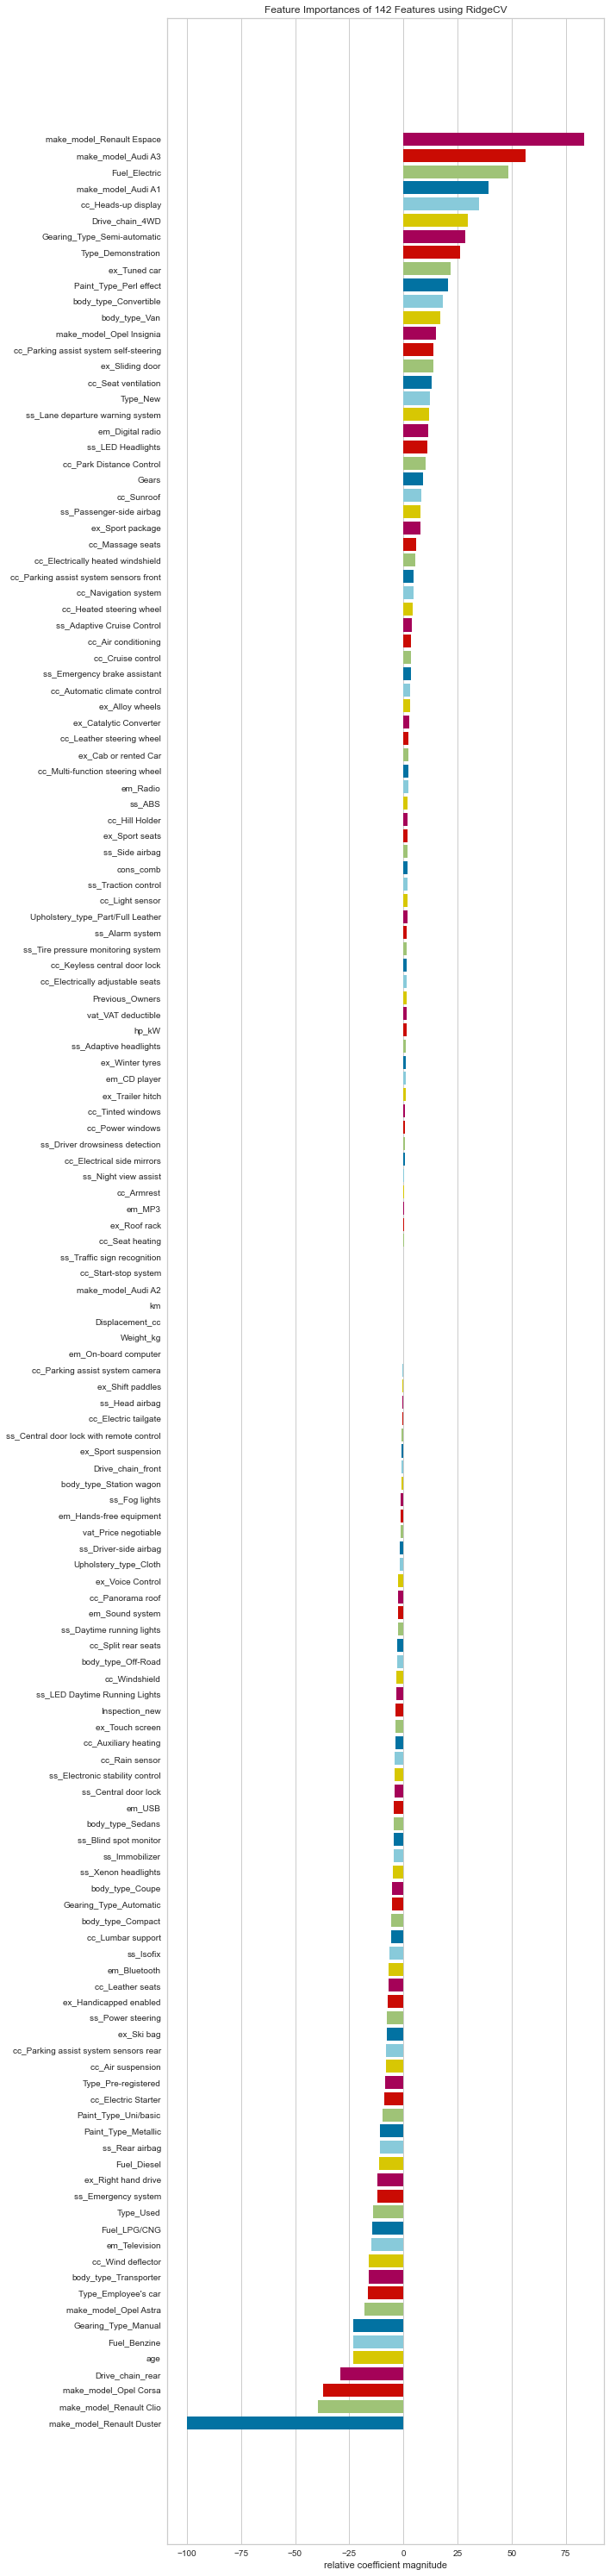

<AxesSubplot:title={'center':'Feature Importances of 142 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [92]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

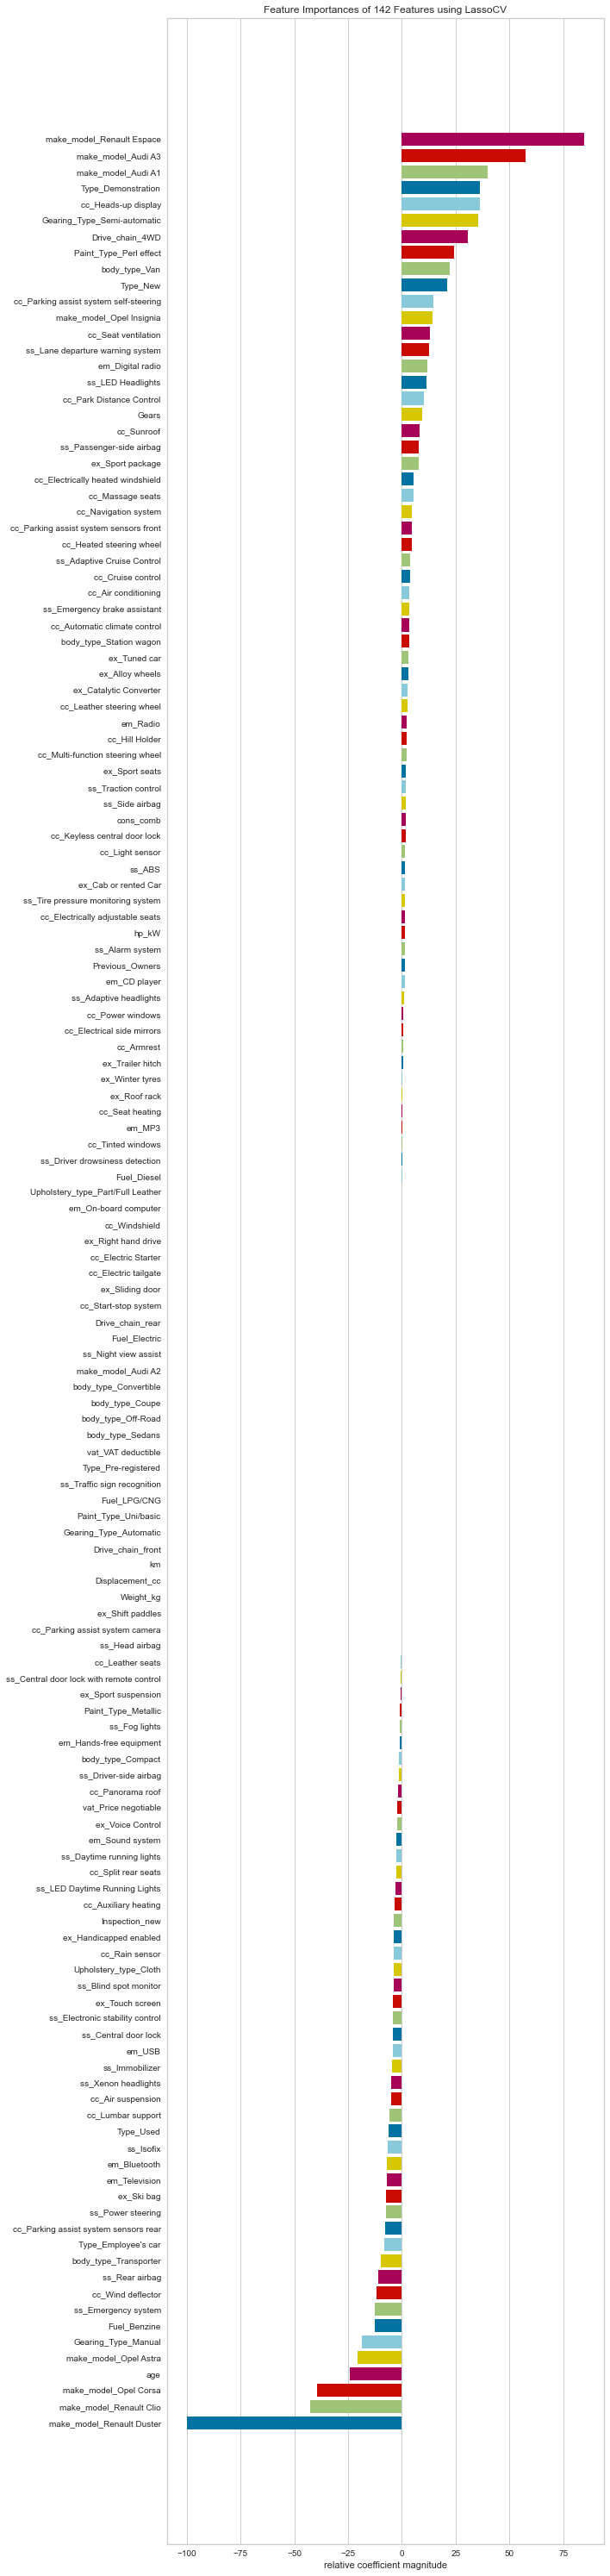

<AxesSubplot:title={'center':'Feature Importances of 142 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [103]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [100]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [101]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [102]:
lasso_cv_model.alpha_

1.0

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___